<!-- Main Title with color and center alignment -->
<h1 style="color:darkblue; text-align:center; font-family:Arial;">💎 Diamonds Dataset Analysis 💎</h1>

<!-- Subtitle with italic and color -->
<h3 style="color:darkred; text-align:center; font-family:Verdana;">
Data Modification: <em>EDA, Cleaning, and Transformation</em>
</h3>

<!-- Description paragraph with font size and color -->
<p style="color:black; font-size:16px; font-family:Georgia; text-align:justify;">
This notebook focuses on exploring, cleaning, and transforming the diamonds dataset. 
We will perform step-by-step analysis including data inspection, cleaning, creating new features, 
and summarizing insights for visualization and further analysis.
</p>


<!-- Section Header with color and underline -->
<h2 style="color:darkblue; font-family:Verdana;">
1. Setup
</h2>
<hr style="border:1px solid darkblue;">

<!-- Description with italic and different font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
Import the required libraries and load the <strong>diamonds</strong> dataset.
</p>


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

print("Dataset loaded successfully!")
print(f"Shape: {diamonds.shape}")


<!-- Section Header with color and underline -->
<h2 style="color:darkblue; font-family:Verdana;">
2. Exploratory Data Analysis (EDA)
</h2>
<hr style="border:1px solid darkblue;">

<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
Let's explore the dataset structure, data types, and basic statistics.
</p>


In [ ]:
# Display basic information about the dataset
print("=" * 60)
print("DATASET SHAPE")
print("=" * 60)
print(f"Rows: {diamonds.shape[0]:,}")
print(f"Columns: {diamonds.shape[1]}")
print()

print("=" * 60)
print("FIRST FEW ROWS")
print("=" * 60)
diamonds.head(10)


In [ ]:
# Data types and basic info
print("=" * 60)
print("DATA TYPES AND INFO")
print("=" * 60)
print(diamonds.dtypes)
print()
print(diamonds.info())


In [ ]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = diamonds.isnull().sum()
missing_pct = (missing / len(diamonds)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")


In [ ]:
# Unique values for categorical columns
print("=" * 60)
print("UNIQUE VALUES FOR CATEGORICAL COLUMNS")
print("=" * 60)
categorical_cols = diamonds.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    unique_vals = diamonds[col].unique()
    print(f"\n{col}:")
    print(f"  Unique count: {len(unique_vals)}")
    print(f"  Values: {list(unique_vals)}")
    print(f"  Value counts:")
    print(diamonds[col].value_counts().to_string())


In [ ]:
# Basic statistics for numerical columns
print("=" * 60)
print("NUMERICAL SUMMARY STATISTICS")
print("=" * 60)
diamonds.describe()


<!-- Section Header with color and underline -->
<h2 style="color:darkblue; font-family:Verdana;">
3. Data Cleaning
</h2>
<hr style="border:1px solid darkblue;">

<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
Handle missing values, set proper data types, and rename columns if needed.
</p>


In [ ]:
# Create a copy for cleaning
df_clean = diamonds.copy()

print("Starting data cleaning process...")
print(f"Original shape: {df_clean.shape}")


In [ ]:
# Handle missing values (if any)
# Since diamonds dataset typically has no missing values, we'll document the approach
if df_clean.isnull().sum().sum() > 0:
    print("Missing values detected. Handling them...")
    # For numerical columns, we could use median or mean
    # For categorical columns, we could use mode or 'Unknown'
    # For this dataset, we'll document the approach but likely won't need it
    print("Missing value handling strategy:")
    print("  - Numerical: Fill with median (robust to outliers)")
    print("  - Categorical: Fill with mode or 'Unknown'")
else:
    print("No missing values to handle. Dataset is complete.")


In [ ]:
# Set proper data types
# Convert categorical columns to category type for better performance and memory usage
print("\nSetting proper data types...")

# Categorical columns that should be ordered
ordered_categories = {
    'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],  # D is best, J is worst
    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # IF is best, I1 is worst
}

for col, order in ordered_categories.items():
    if col in df_clean.columns:
        df_clean[col] = pd.Categorical(df_clean[col], categories=order, ordered=True)
        print(f"  - {col}: Converted to ordered categorical")

# Check for any other object columns that should be categorical
other_categorical = df_clean.select_dtypes(include=['object']).columns
for col in other_categorical:
    if col not in ordered_categories:
        df_clean[col] = df_clean[col].astype('category')
        print(f"  - {col}: Converted to categorical")

print("\nData types after conversion:")
print(df_clean.dtypes)

In [ ]:
# Check for outliers in numerical columns
print("\nChecking for potential outliers...")
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"  - {col}: {outliers:,} potential outliers ({outliers/len(df_clean)*100:.2f}%)")
    else:
        print(f"  - {col}: No outliers detected")

print("\nNote: Outliers in diamond data may be legitimate (e.g., very large or expensive diamonds).")
print("We'll keep them unless they represent data entry errors.")

<!-- Section Header with color and underline -->
<h2 style="color:darkblue; font-family:Verdana;">
4. Data Transformation
</h2>
<hr style="border:1px solid darkblue;">

<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
Create helpful derived columns (ratios, bins, flags) and summarize the data.
</p>


In [ ]:
# Create helpful derived columns
print("Creating derived columns...")

# 1. Price per carat (important metric for diamond value)
df_clean['price_per_carat'] = df_clean['price'] / df_clean['carat']
print("  - Created 'price_per_carat': price divided by carat weight")

# 2. Volume (approximate, using x * y * z)
df_clean['volume'] = df_clean['x'] * df_clean['y'] * df_clean['z']
print("  - Created 'volume': x * y * z (cubic mm)")

# 3. Depth percentage (already exists, but let's verify it's correct)
# depth = (z / mean(x, y)) * 100
df_clean['depth_calculated'] = (df_clean['z'] / ((df_clean['x'] + df_clean['y']) / 2)) * 100
print("  - Created 'depth_calculated': calculated depth percentage")

# 4. Table percentage (already exists, but let's verify)
# table = (table width / average of x and y) * 100
print("  - 'table' column already exists as table percentage")

# 5. Size category based on carat
df_clean['size_category'] = pd.cut(
    df_clean['carat'],
    bins=[0, 0.5, 1.0, 2.0, float('inf')],
    labels=['Small', 'Medium', 'Large', 'Very Large']
)
print("  - Created 'size_category': Small (<0.5), Medium (0.5-1.0), Large (1.0-2.0), Very Large (>2.0)")

# 6. Price category
df_clean['price_category'] = pd.qcut(
    df_clean['price'],
    q=4,
    labels=['Budget', 'Mid-Range', 'Premium', 'Luxury']
)
print("  - Created 'price_category': Quartile-based price categories")

# 7. Flag for ideal cut
df_clean['is_ideal_cut'] = (df_clean['cut'] == 'Ideal').astype(int)
print("  - Created 'is_ideal_cut': Binary flag for ideal cut diamonds")

# 8. Flag for best color (D, E, F are considered colorless/premium)
df_clean['is_premium_color'] = df_clean['color'].isin(['D', 'E', 'F']).astype(int)
print("  - Created 'is_premium_color': Binary flag for premium color grades (D, E, F)")

# 9. Flag for best clarity (IF, VVS1, VVS2 are considered flawless/near-flawless)
df_clean['is_premium_clarity'] = df_clean['clarity'].isin(['IF', 'VVS1', 'VVS2']).astype(int)
print("  - Created 'is_premium_clarity': Binary flag for premium clarity grades")

print(f"\nNew shape: {df_clean.shape}")
print(f"New columns: {df_clean.shape[1] - diamonds.shape[1]} additional columns created")


In [ ]:
# Display the new columns
print("New columns created:")
new_cols = [col for col in df_clean.columns if col not in diamonds.columns]
print(new_cols)
print("\nSample of new columns:")
df_clean[['carat', 'price', 'price_per_carat', 'size_category', 'price_category', 
          'is_ideal_cut', 'is_premium_color', 'is_premium_clarity']].head(10)


In [ ]:
# Summary by cut quality
print("=" * 60)
print("SUMMARY BY CUT QUALITY")
print("=" * 60)
cut_summary = df_clean.groupby('cut', observed=False).agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean',
    'price_per_carat': 'mean'
}).round(2)
cut_summary.columns = ['Avg Price', 'Median Price', 'Count', 'Avg Carat', 'Avg Price/Carat']
cut_summary


In [ ]:
# Summary by color grade
print("=" * 60)
print("SUMMARY BY COLOR GRADE")
print("=" * 60)
color_summary = df_clean.groupby('color', observed=False).agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean',
    'price_per_carat': 'mean'
}).round(2)
color_summary.columns = ['Avg Price', 'Median Price', 'Count', 'Avg Carat', 'Avg Price/Carat']
color_summary


In [ ]:
# Summary by clarity grade
print("=" * 60)
print("SUMMARY BY CLARITY GRADE")
print("=" * 60)
clarity_summary = df_clean.groupby('clarity', observed=False).agg({
    'price': ['mean', 'median', 'count'],
    'carat': 'mean',
    'price_per_carat': 'mean'
}).round(2)
clarity_summary.columns = ['Avg Price', 'Median Price', 'Count', 'Avg Carat', 'Avg Price/Carat']
clarity_summary


In [ ]:
# Summary by size category
print("=" * 60)
print("SUMMARY BY SIZE CATEGORY")
print("=" * 60)
size_summary = df_clean.groupby('size_category', observed=False).agg({
    'price': ['mean', 'median', 'count'],
    'carat': ['mean', 'min', 'max'],
    'price_per_carat': 'mean'
}).round(2)
size_summary.columns = ['Avg Price', 'Median Price', 'Count', 'Avg Carat', 'Min Carat', 'Max Carat', 'Avg Price/Carat']
size_summary


In [ ]:
# Pivot table: Average price by cut and color
print("=" * 60)
print("PIVOT TABLE: AVERAGE PRICE BY CUT AND COLOR")
print("=" * 60)
pivot_cut_color = pd.pivot_table(
    df_clean,
    values='price',
    index='cut',
    columns='color',
    aggfunc='mean',
    observed=False
).round(0)
pivot_cut_color


In [ ]:
# Pivot table: Average price per carat by cut and clarity
print("=" * 60)
print("PIVOT TABLE: AVERAGE PRICE PER CARAT BY CUT AND CLARITY")
print("=" * 60)
pivot_cut_clarity = pd.pivot_table(
    df_clean,
    values='price_per_carat',
    index='cut',
    columns='clarity',
    aggfunc='mean',
    observed=False
).round(0)
pivot_cut_clarity


In [ ]:
# Value counts for categorical variables
print("=" * 60)
print("VALUE COUNTS FOR CATEGORICAL VARIABLES")
print("=" * 60)

print("\nCut distribution:")
print(df_clean['cut'].value_counts().sort_index())

print("\nColor distribution:")
print(df_clean['color'].value_counts().sort_index())

print("\nClarity distribution:")
print(df_clean['clarity'].value_counts().sort_index())

print("\nSize category distribution:")
print(df_clean['size_category'].value_counts().sort_index())

print("\nPrice category distribution:")
print(df_clean['price_category'].value_counts())


In [ ]:
# Cross-tabulation: Cut vs Color
print("=" * 60)
print("CROSS-TABULATION: CUT vs COLOR")
print("=" * 60)
pd.crosstab(df_clean['cut'], df_clean['color'], margins=True)


In [ ]:
# Summary statistics for premium flags
print("=" * 60)
print("PREMIUM FEATURES SUMMARY")
print("=" * 60)
premium_summary = pd.DataFrame({
    'Ideal Cut': [df_clean['is_ideal_cut'].sum(), f"{df_clean['is_ideal_cut'].mean()*100:.1f}%"],
    'Premium Color (D/E/F)': [df_clean['is_premium_color'].sum(), f"{df_clean['is_premium_color'].mean()*100:.1f}%"],
    'Premium Clarity (IF/VVS)': [df_clean['is_premium_clarity'].sum(), f"{df_clean['is_premium_clarity'].mean()*100:.1f}%"]
}, index=['Count', 'Percentage'])
premium_summary


<!-- Section Header with color and underline -->
<h2 style="color:darkblue; font-family:Verdana;">
5. Visualization
</h2>
<hr style="border:1px solid darkblue;">

<!-- Short Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
Use <strong>Seaborn</strong> and <strong>Manim</strong> to visualize distributions, comparisons, and relationships with clear titles and labels.
</p>
<hr style="border:1px solid darkblue;">

<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.1 Diamond Price Distribution by Cut
</h3>


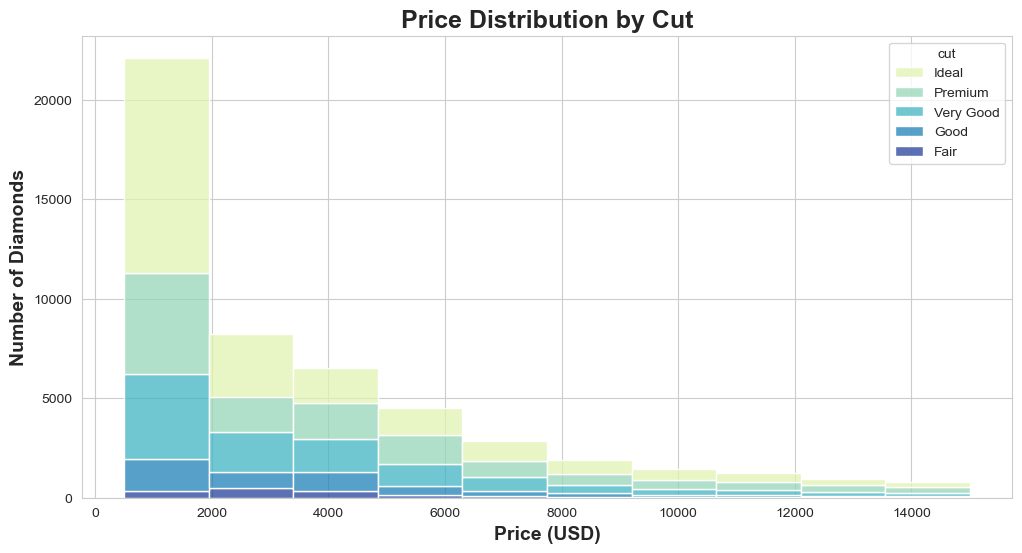

In [43]:
# Limit price range for readability
plt.figure(figsize=(12, 6))
sns.histplot(
    data=diamonds[(diamonds['price'] >= 500) & (diamonds['price'] <= 15000)],  
    x='price',
    hue='cut',
    multiple='stack',
    palette='YlGnBu',
    bins=10  
)

plt.title('Price Distribution by Cut', fontsize=18, fontweight='bold')

plt.xlabel('Price (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Diamonds', fontsize=14, fontweight='bold')

plt.show()

<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
This stacked histogram shows the <strong>distribution of diamond prices by cut quality</strong>. The horizontal axis represents price (USD), and the vertical axis shows the number of diamonds. Cuts include <strong>Ideal, Premium, Very Good, Good,</strong> and <strong>Fair</strong>, indicated with different colors.
</p>

<!-- Key Insights / Takeaways -->
<p style="font-family:Georgia; font-size:15px; color:black;">
<strong>Key Insights:</strong><br>
- Most diamonds are in lower price ranges, with <strong>Ideal</strong> and <strong>Premium</strong> cuts dominating.<br>
- As price increases, the number of diamonds drops, and higher-priced diamonds are mostly <strong>Premium</strong> or <strong>Ideal</strong>.<br>
- <strong>Fair</strong> and <strong>Good</strong> cuts are rare across all prices.
</p>


<hr style="border:1px solid darkblue;">
<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.2 Relationship Plot - Scatter: Carat vs Price (colored by Clarity)
</h3>


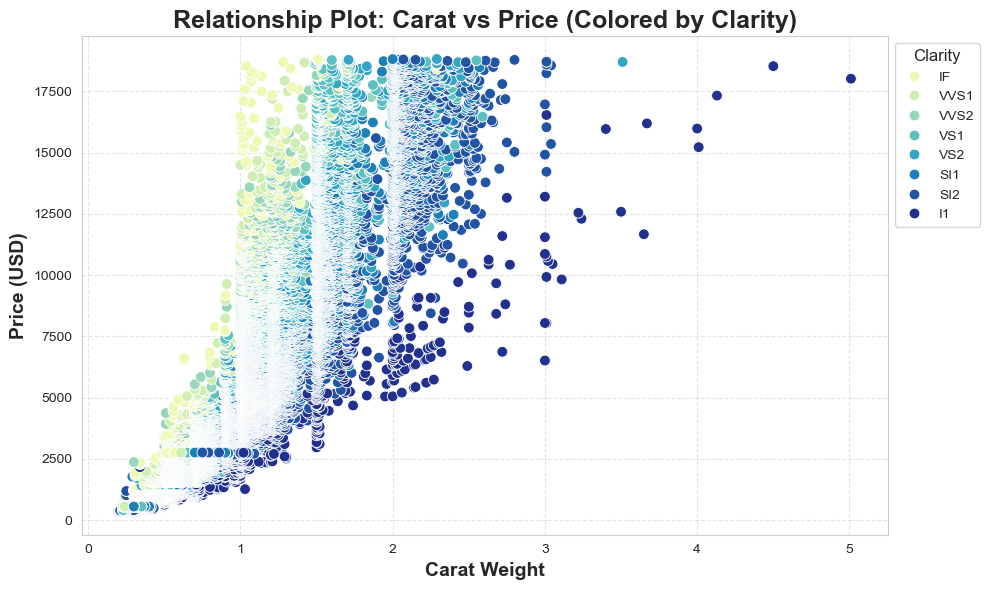

In [44]:
# Relationship Plot - Scatter: Carat vs Price (colored by Clarity)

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=diamonds,
    x='carat',
    y='price',
    hue='clarity',       # Color points by clarity
    palette='YlGnBu',    # Gradient color palette
    edgecolor='w',
    s=60                 # Marker size
)

plt.title('Relationship Plot: Carat vs Price (Colored by Clarity)', fontsize=18, fontweight='bold')
plt.xlabel('Carat Weight', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14, fontweight='bold')

# Legend outside the plot
plt.legend(title='Clarity', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
This scatter plot shows the <strong>relationship between diamond carat weight and price</strong>, colored by <strong>clarity</strong>. Each point represents a single diamond, with colors ranging from <strong>IF</strong> (flawless) to <strong>I1</strong> (lowest clarity).
</p>

<!-- Key Insights / Takeaways -->
<p style="font-family:Georgia; font-size:15px; color:black;">
<strong>Key Insights:</strong><br>
- As <strong>carat weight increases</strong>, <strong>price generally increases</strong>, showing a strong positive relationship.<br>
- Diamonds with higher clarity (<strong>IF, VVS1, VVS2</strong>) tend to have <strong>higher prices</strong> for the same carat weight.<br>
- Diamonds with lower clarity (<strong>SI1, SI2, I1</strong>) are spread across lower prices, even for larger carat sizes.<br>
- Most diamonds are concentrated under <strong>2 carats</strong> and <strong>$10,000</strong> in price.<br>
- This plot demonstrates that <strong>carat weight and clarity</strong> are major determinants of diamond value.
</p>


<hr style="border:1px solid darkblue;">
<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.3. Heatmap - Average Price per Carat: Cut × Color
</h3>


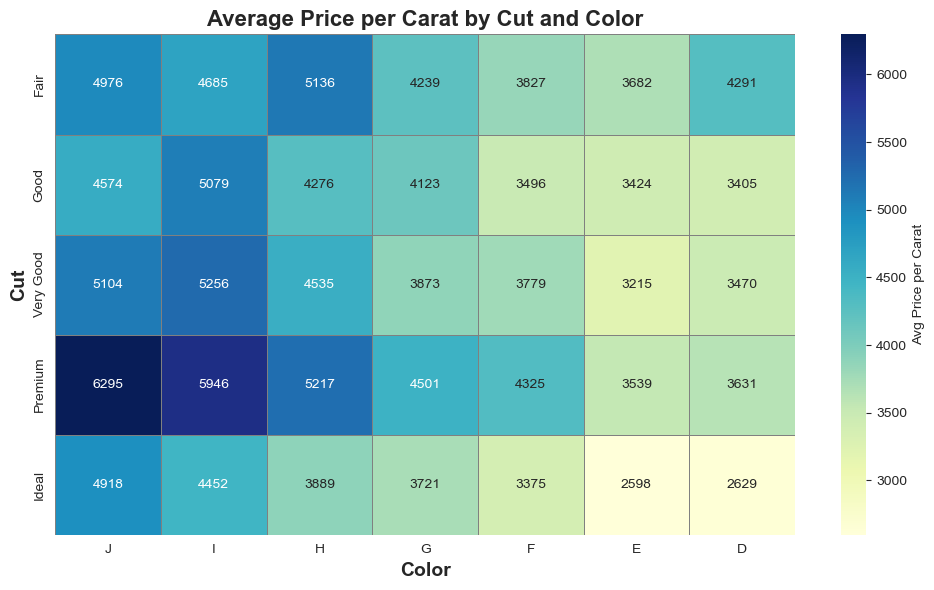

In [45]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_cut_color,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Avg Price per Carat'},
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Average Price per Carat by Cut and Color", fontsize=16, fontweight='bold')
plt.xlabel("Color", fontsize=14, fontweight='bold')
plt.ylabel("Cut", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<p style="font-family:Georgia; font-size:15px; color:black;">
This heatmap shows the <strong>average price per carat</strong> of diamonds by <strong>cut</strong> and <strong>color</strong>. Darker cells indicate higher prices.
</p>

<p style="font-family:Georgia; font-size:15px; color:black;">
<strong>Key Insights:</strong><br>
1. <strong>Premium</strong> cut has the highest prices, peaking at color <strong>J</strong>, while <strong>Ideal</strong> is also high for J.<br>
2. <strong>Fair</strong> cut consistently has the lowest prices, showing that <strong>cut quality</strong> impacts price more than color.
</p>


<hr style="border:1px solid darkblue;">
<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.4. Regression Plot - Carat vs Price with Trend Line
</h3>


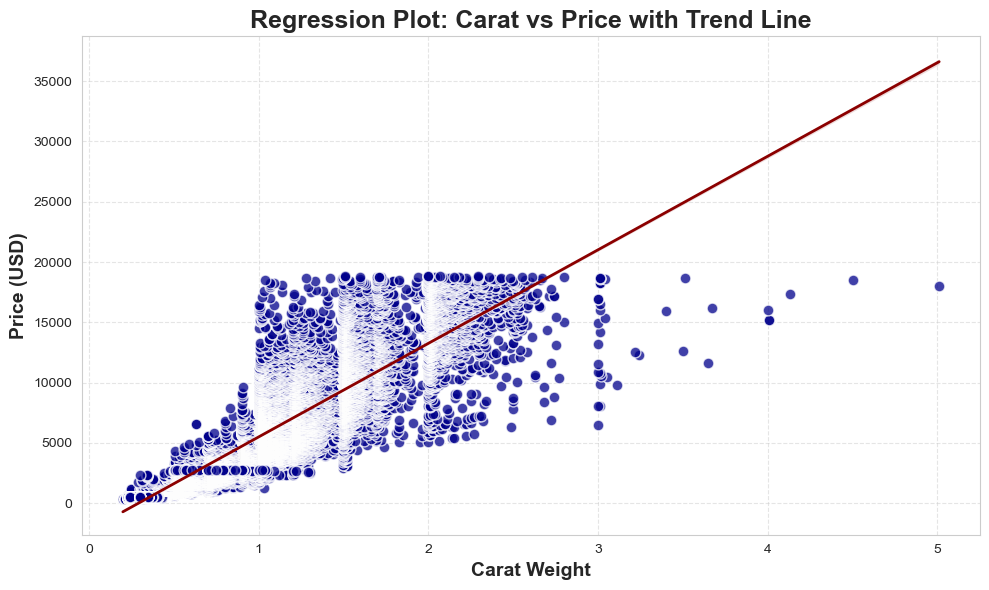

In [46]:
# Regression Plot - Carat vs Price with Trend Line
plt.figure(figsize=(10, 6))

sns.regplot(
    data=diamonds,
    x='carat',
    y='price',
    scatter_kws={'alpha':0.75, 'edgecolor':'w', 's':60, 'color':'darkblue'},  # softer blue points
    line_kws={'color':'darkred', 'linewidth':2}                              
)

plt.title('Regression Plot: Carat vs Price with Trend Line', fontsize=18, fontweight='bold')
plt.xlabel('Carat Weight', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<hr style="border:1px solid darkblue;">
<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.4.1 Visualization of Regression Plot using Manim
</h3>


In [ ]:
%load_ext manim


In [47]:
%%manim -ql RegressionPlotCaratPrice

from manim import *
import seaborn as sns
import numpy as np

diamonds = sns.load_dataset("diamonds")
data = diamonds.sample(1000, random_state=42)

class RegressionPlotCaratPrice(Scene):
    def construct(self):
        x = data['carat']
        y = data['price']

        # Linear regression
        m, b = np.polyfit(x, y, 1)

        # Axes ranges
        x_min, x_max = 0, 5
        y_min, y_max = 0, 35000
        x_ticks = np.arange(x_min, x_max+1, 1)
        y_ticks = np.arange(y_min, y_max+1, 5000)

        # Axes shifted up for better label visibility
        axes = Axes(
            x_range=[x_min, x_max, 1],
            y_range=[y_min, y_max, 5000],
            x_length=10, y_length=5.6,
            axis_config={"include_tip": False, "font_size": 21, "stroke_width": 2}
        ).shift(UP*0.3)
        xlabel = Text("Carat Weight", font_size=31, weight=BOLD).next_to(axes, DOWN, buff=0.35)
        ylabel = Text("Price (USD)", font_size=31, weight=BOLD).next_to(axes, LEFT, buff=0.38).rotate(PI/2)
        title = Text("Regression Plot: Carat vs Price with Trend Line", font_size=35, weight=BOLD).to_edge(UP)
        self.play(Create(axes), Write(title), Write(xlabel), Write(ylabel))

        # Tick labels, x in bold for each integer value (0,1,2,3,4,5)
        xlabels = VGroup(
            *[Text(str(int(l)), font_size=21, weight=BOLD)
              .next_to(axes.c2p(l, 0), DOWN, buff=0.23)
              for l in x_ticks]
        )
        ylabels = VGroup(
            *[Text(str(int(l)), font_size=21, weight=BOLD)
              .next_to(axes.c2p(x_min, l), LEFT, buff=0.13)
              for l in y_ticks]
        )
        self.play(FadeIn(xlabels), FadeIn(ylabels))

        # Plot only the points in the displayed range
        dots = VGroup(
            *[Dot(
                axes.c2p(float(xi), float(yi)),
                radius=0.08,
                color="#254377",
                fill_opacity=0.75,
                stroke_width=1.7,
                stroke_color=WHITE
            ) for xi, yi in zip(x, y) if (x_min <= xi <= x_max and y_min <= yi <= y_max)]
        )
        self.play(LaggedStart(*[GrowFromCenter(dot) for dot in dots], lag_ratio=0.009), run_time=1.9)

        # Regression line in dark red
        xr = np.array([x_min, x_max])
        yr = m * xr + b
        reg_line = axes.plot_line_graph(
            x_values=xr, y_values=yr,
            add_vertex_dots=False,
            line_color="#8B1113",  # darkred
            stroke_width=7
        )
        self.play(Create(reg_line), run_time=1.1)
        self.wait(2)


Manim Community v0.19.0

[11/10/25 17:22:33] INFO     Animation 0 : Using cached data (hash :                           ]8;id=979935;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=479902;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py#89\89]8;;\
                             1185818338_2811827726_223132457)                                                      

[11/10/25 17:22:35] INFO     Animation 1 : Using cached data (hash :                           ]8;id=434074;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=248960;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py#89\89]8;;\
                             624642324_1914546173_2861813973)                                                      

[11/10/25 17:22:41] INFO     Animation 2 : Using cached data (hash :                           ]8;id=843272;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=319793;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py#89\89]8;;\
                             624642324_2365096210_3286021967)                                                      

[11/10/25 17:22:53] INFO     Animation 3 : Using cached data (hash :                           ]8;id=626805;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=564772;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py#89\89]8;;\
                             624642324_161028745_1140999873)                                                       

[11/10/25 17:22:58] INFO     Animation 4 : Using cached data (hash :                           ]8;id=366563;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=493313;file://C:\Users\User\anaconda3\Lib\site-packages\manim\renderer\cairo_renderer.py#89\89]8;;\
                             624642324_2408024828_624800423)                                                       

                    INFO     Combining to Movie file.                                      ]8;id=898243;file://C:\Users\User\anaconda3\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=207048;file://C:\Users\User\anaconda3\Lib\site-packages\manim\scene\scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=359149;file://C:\Users\User\anaconda3\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=748059;file://C:\Users\User\anaconda3\Lib\site-packages\manim\scene\scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             'C:\Users\User\Desktop\Jupiter_Machine_Learning\media\videos\                         
                             Jupiter_Machine_Learning\480p15\RegressionPlotCaratPrice.mp4'                         
                                                                                                                   

                    INFO     Rendered RegressionPlotCaratPrice                                         ]8;id=517364;file://C:\Users\User\anaconda3\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=753906;file://C:\Users\User\anaconda3\Lib\site-packages\manim\scene\scene.py#255\255]8;;\
                             Played 5 animations                                                                   

<hr style="border:1px solid darkblue;">
<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.5. Box Plot - Price per Carat by Color Grade
</h3>


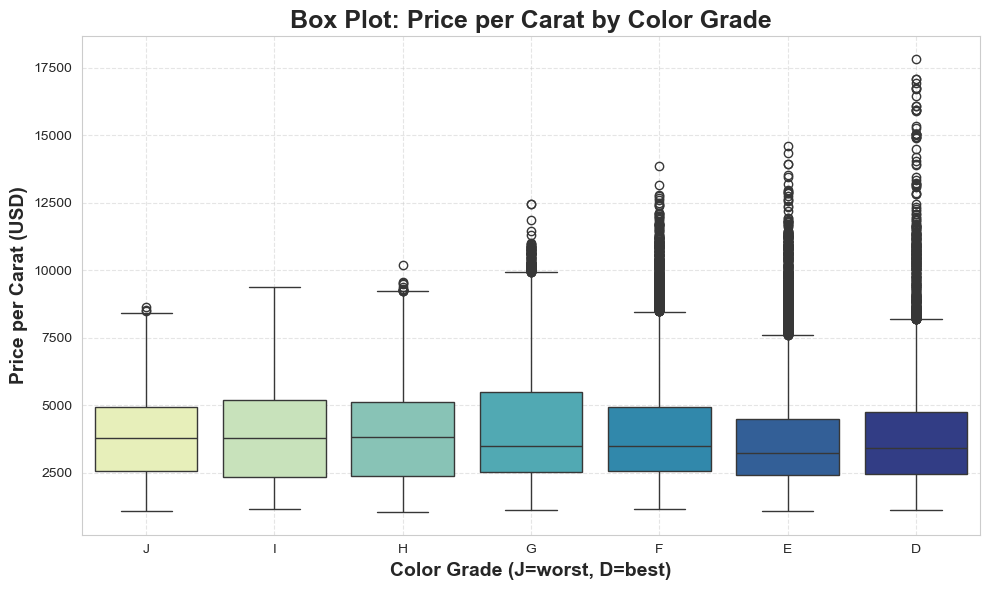

In [48]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean,
    x='color',
    y='price_per_carat',
    hue='color',
    order=['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    palette='YlGnBu',
    legend=False
)

plt.title('Box Plot: Price per Carat by Color Grade', fontsize=18, fontweight='bold')
plt.xlabel('Color Grade (J=worst, D=best)', fontsize=14, fontweight='bold')
plt.ylabel('Price per Carat (USD)', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
This box plot shows the <strong>distribution of price per carat</strong> across different <strong>color grades</strong>. The boxes represent the interquartile range (IQR), with the median line inside, and whiskers extending to show the range of values.
</p>

<!-- Key Insights / Takeaways -->
<p style="font-family:Georgia; font-size:15px; color:black;">
<strong>Key Insights:</strong><br>
- The median price per carat shows variation across color grades, with <strong>G, F, and D</strong> colors showing higher median values.<br>
- There is significant overlap in price per carat ranges across color grades, indicating that <strong>color alone is not the sole price determinant</strong>.<br>
- <strong>Outliers</strong> (points beyond the whiskers) are present across all color grades, representing premium diamonds with exceptional value per carat.<br>
- The distribution shows that while better color grades (D, E, F) tend to command higher prices per carat, the relationship is not strictly linear, as <strong>cut quality and clarity</strong> also play crucial roles.
</p>


<hr style="border:1px solid darkblue;">
<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.6. Violin Plot - Price per Carat Distribution by Clarity Grade
</h3>


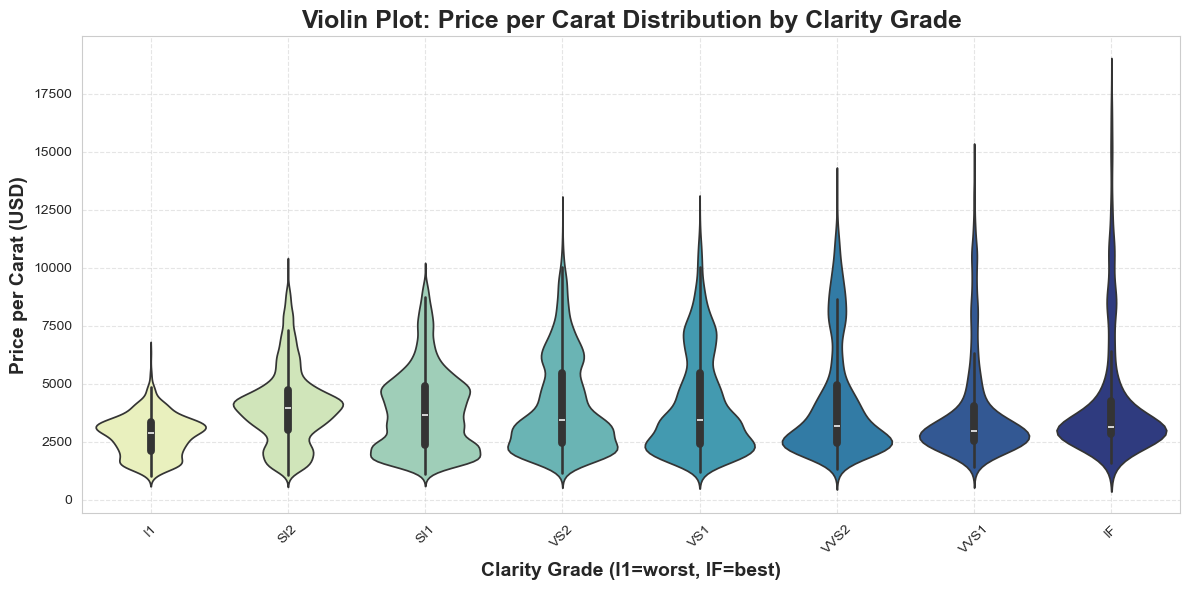

In [49]:
plt.figure(figsize=(12, 6))

order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.violinplot(
    data=df_clean,
    x='clarity',
    y='price_per_carat',
    hue='clarity',
    order=order,
    palette='YlGnBu',
    legend=False
)

plt.title('Violin Plot: Price per Carat Distribution by Clarity Grade', fontsize=18, fontweight='bold')
plt.xlabel('Clarity Grade (I1=worst, IF=best)', fontsize=14, fontweight='bold')
plt.ylabel('Price per Carat (USD)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
This violin plot shows the <strong>distribution shape and density</strong> of price per carat across different <strong>clarity grades</strong>. The width of each violin represents the density of diamonds at that price per carat level, providing insight into where most diamonds cluster.
</p>

<!-- Key Insights / Takeaways -->
<p style="font-family:Georgia; font-size:15px; color:black;">
<strong>Key Insights:</strong><br>
- Higher clarity grades (<strong>IF, VVS1, VVS2</strong>) show <strong>wider distributions</strong> at higher price per carat levels, indicating greater value premium.<br>
- Lower clarity grades (<strong>I1, SI2</strong>) have more <strong>concentrated distributions</strong> at lower price per carat values.<br>
- The <strong>median price per carat increases</strong> as clarity improves from I1 to IF, confirming that clarity is a significant value driver.<br>
- <strong>Bimodal distributions</strong> are visible in some clarity grades (e.g., VS2, VS1), suggesting distinct market segments within the same clarity category.<br>
- The violin shapes reveal that <strong>premium clarity diamonds</strong> (IF, VVS) have a broader price range, reflecting their rarity and desirability in the market.
</p>


<!-- Section Header with color and underline -->
<h2 style="color:darkblue; font-family:Verdana;">
6. Deeper Analysis: Price per Carat Controlling for Size
</h2>
<hr style="border:1px solid darkblue;">

<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
The previous summaries showed counterintuitive patterns because better color/clarity diamonds tend to be smaller. Let's analyze price per carat while controlling for size to see the true relationship.
</p>


In [ ]:
# Price per carat by color, controlling for size category
print("=" * 60)
print("PRICE PER CARAT BY COLOR (CONTROLLING FOR SIZE)")
print("=" * 60)
color_size_price = df_clean.groupby(['color', 'size_category'], observed=False)['price_per_carat'].mean().unstack()
print(color_size_price.round(2))
print("\nNote: Within each size category, better color (D/E/F) should show higher price per carat")


<hr style="border:1px solid darkblue;">
<!-- Subsection Header with color and underline -->
<h3 style="color:darkred; font-family:Verdana;">
5.7. Faceted Box Plot - Price per Carat by Color (Controlling for Size)
</h3>


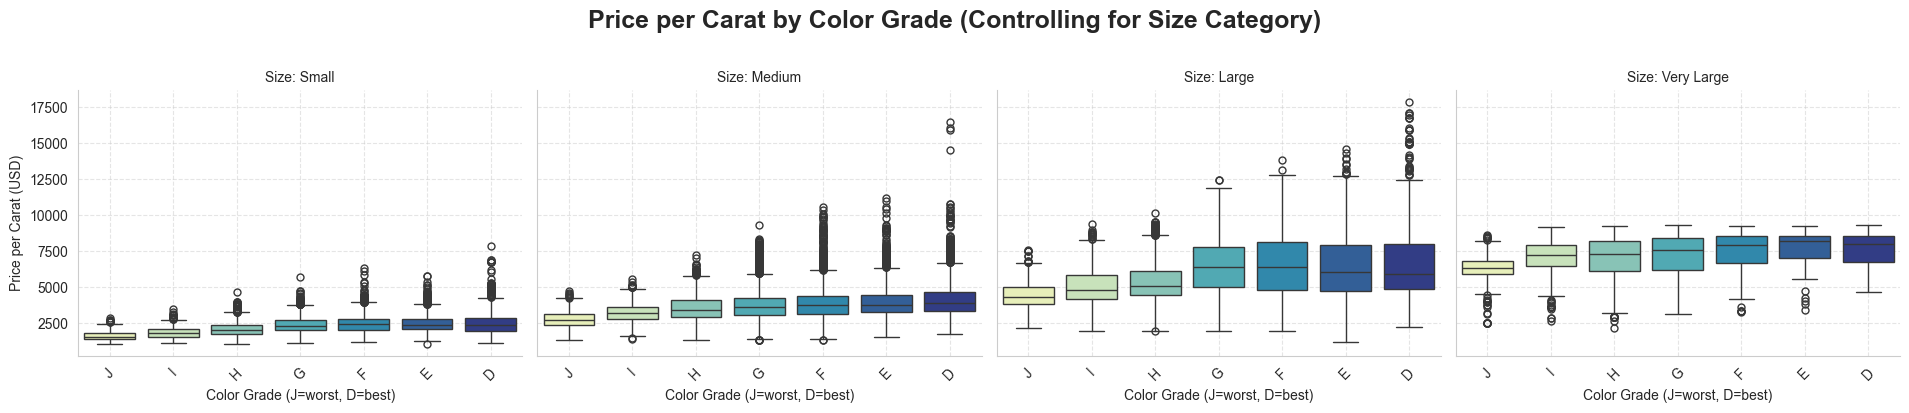

In [33]:
g = sns.catplot(
    data=df_clean,
    x='color',
    y='price_per_carat',
    col='size_category',
    col_order=['Small', 'Medium', 'Large', 'Very Large'],
    kind='box',
    order=['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    palette='YlGnBu',
    hue='color',
    height=4,
    aspect=1.2,
    sharey=True,
    legend=False
)

g.set_axis_labels('Color Grade (J=worst, D=best)', 'Price per Carat (USD)')
g.set_titles('Size: {col_name}')
g.fig.suptitle('Price per Carat by Color Grade (Controlling for Size Category)', 
               fontsize=18, fontweight='bold', y=1.02)

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


<!-- Description with styled font -->
<p style="font-family:Georgia; font-size:15px; color:black;">
This faceted box plot shows the <strong>distribution of price per carat by color grade</strong>, with separate panels for each <strong>size category</strong> (Small, Medium, Large, Very Large). This visualization controls for size, addressing the Simpson's paradox we discovered earlier.
</p>

<!-- Key Insights / Takeaways -->
<p style="font-family:Georgia; font-size:15px; color:black;">
<strong>Key Insights:</strong><br>
- <strong>Within each size category</strong>, better color grades (D, E, F) consistently show <strong>higher median price per carat</strong> than lower grades (J, I, H), confirming the expected business logic.<br>
- The relationship between color and price per carat is <strong>consistent across all size categories</strong>, demonstrating that color quality adds value regardless of diamond size.<br>
- <strong>Larger diamonds</strong> (Large, Very Large) show higher absolute price per carat values, but the <strong>relative premium</strong> for better colors remains similar across sizes.<br>
- This plot resolves the counterintuitive pattern seen in unadjusted averages, where better colors appeared to have lower prices due to their association with smaller diamonds.<br>
- The faceted approach allows for <strong>fair comparisons</strong> by isolating the effect of color while holding size constant.
</p>


In [ ]:
# Price per carat by clarity, controlling for size category  
print("=" * 60)
print("PRICE PER CARAT BY CLARITY (CONTROLLING FOR SIZE)")
print("=" * 60)
clarity_size_price = df_clean.groupby(['clarity', 'size_category'], observed=False)['price_per_carat'].mean().unstack()
print(clarity_size_price.round(2))
print("\nNote: Within each size category, better clarity (IF/VVS) should show higher price per carat")


In [ ]:
# Focus on medium-sized diamonds (0.5-1.0 carat) where most data is
print("=" * 60)
print("ANALYSIS FOR MEDIUM DIAMONDS (0.5-1.0 carat)")
print("=" * 60)
medium_diamonds = df_clean[(df_clean['carat'] >= 0.5) & (df_clean['carat'] <= 1.0)]
print(f"Number of diamonds in this range: {len(medium_diamonds):,} ({len(medium_diamonds)/len(df_clean)*100:.1f}% of total)")

print("\nPrice per carat by color (0.5-1.0 carat range):")
color_medium = medium_diamonds.groupby('color', observed=False)['price_per_carat'].agg(['mean', 'count']).round(2)
color_medium.columns = ['Avg Price/Carat', 'Count']
print(color_medium.sort_index())


In [ ]:
print("\nPrice per carat by clarity (0.5-1.0 carat range):")
clarity_medium = medium_diamonds.groupby('clarity', observed=False)['price_per_carat'].agg(['mean', 'count']).round(2)
clarity_medium.columns = ['Avg Price/Carat', 'Count']
print(clarity_medium.sort_index())


In [ ]:
# Visual comparison: Average carat size by color and clarity
print("=" * 60)
print("AVERAGE CARAT SIZE BY COLOR AND CLARITY")
print("=" * 60)
print("\nThis shows why the unadjusted averages were misleading:")
print("\nAverage carat by color:")
print(df_clean.groupby('color', observed=False)['carat'].mean().sort_index().round(3))
print("\nAverage carat by clarity:")
print(df_clean.groupby('clarity', observed=False)['carat'].mean().sort_index().round(3))


<!-- Section Header with color and underline -->
<h2 style="color:darkblue; font-family:Verdana; border-bottom:2px solid darkblue; padding-bottom:5px;">
7. Insights & Summary
</h2>

<!-- Short Description -->
<p style="font-family:Georgia; font-size:15px; color:black;">
This section presents the key steps in data preparation, summarizes the transformations applied to the diamonds dataset, and highlights the main insights from the analysis. It provides both a procedural overview and actionable findings for understanding diamond pricing patterns.
</p>

<!-- Subsection Header -->
<h3 style="color:darkred; font-family:Verdana; margin-top:15px;">
Steps Completed
</h3>

<div style="font-family:Georgia; font-size:15px; color:#333; line-height:1.6;">
<p><strong>1. Data Loading:</strong> Loaded the diamonds dataset using Seaborn (53,940 rows, 10 columns).</p>

<p><strong>2. Exploratory Data Analysis:</strong><br>
&nbsp;&nbsp;- Examined dataset shape, data types, and structure.<br>
&nbsp;&nbsp;- Checked for missing values (none found).<br>
&nbsp;&nbsp;- Analyzed unique values for categorical columns (<em>cut</em>, <em>color</em>, <em>clarity</em>).<br>
&nbsp;&nbsp;- Reviewed numerical summary statistics.
</p>

<p><strong>3. Data Cleaning:</strong><br>
&nbsp;&nbsp;- Converted categorical columns to ordered categories:<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Cut: Fair &lt; Good &lt; Very Good &lt; Premium &lt; Ideal<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Color: J (worst) to D (best)<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Clarity: I1 (worst) to IF (best)<br>
&nbsp;&nbsp;- Checked for outliers (kept them, as they represent legitimate luxury diamonds).<br>
&nbsp;&nbsp;- No missing values to handle.
</p>

<p><strong>4. Data Transformation:</strong><br>
&nbsp;&nbsp;- Created derived columns:<br>
&nbsp;&nbsp;&nbsp;&nbsp;- <code>price_per_carat</code>: price divided by carat weight.<br>
&nbsp;&nbsp;&nbsp;&nbsp;- <code>volume</code>: x * y * z (cubic mm).<br>
&nbsp;&nbsp;&nbsp;&nbsp;- <code>depth_calculated</code>: calculated depth percentage.<br>
&nbsp;&nbsp;&nbsp;&nbsp;- <code>size_category</code>: binned carat into Small, Medium, Large, Very Large.<br>
&nbsp;&nbsp;&nbsp;&nbsp;- <code>price_category</code>: quartile-based price categories (Budget, Mid-Range, Premium, Luxury).<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Flags for premium features:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- <code>is_ideal_cut</code> (Ideal cut diamonds)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- <code>is_premium_color</code> (D, E, F grades)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- <code>is_premium_clarity</code> (IF, VVS1, VVS2)
</p>

<p><strong>5. Data Summarization:</strong><br>
&nbsp;&nbsp;- Groupby aggregations by cut, color, clarity, and size category.<br>
&nbsp;&nbsp;- Pivot tables showing relationships between cut/color and cut/clarity.<br>
&nbsp;&nbsp;- Value counts for categorical variables.<br>
&nbsp;&nbsp;- Cross-tabulations for cut vs color.<br>
&nbsp;&nbsp;- Summary of premium features.
</p>

</div>

<!-- Subsection Header -->
<h3 style="color:darkred; font-family:Verdana; margin-top:20px;">
Key Insights
</h3>

<div style="font-family:Georgia; font-size:15px; color:#333; line-height:1.6;">
<p>💎 <strong>1. Carat weight is the strongest price driver.</strong><br>
As carat increases, price rises exponentially. Larger diamonds (>2 carats) belong mostly to the <em>Luxury</em> segment and show the highest <code>price_per_carat</code> values.</p>

<p>💎 <strong>2. Cut quality has a clear impact on price and value.</strong><br>
<em>Premium</em> and <em>Ideal</em> cuts consistently show higher average prices and price per carat, confirming the influence of cut precision on diamond value.</p>

<p>💎 <strong>3. Color affects price, but cut is stronger.</strong><br>
Although high clarity adds value, color does not always follow D → J; for some cuts, color J can be pricier than mid-range colors, highlighting the stronger effect of cut and carat.</p>


<!-- Subsection Header -->
<h3 style="color:darkred; font-family:Verdana; margin-top:20px;">
Summary Table
</h3>

<p style="font-family:Georgia; font-size:15px; color:#333;">
The table below summarizes key numeric metrics by <strong>cut quality</strong>, showing how price and carat vary across categories.
</p>

In [42]:
# Ensure 'price_per_carat' exists
if 'price_per_carat' not in diamonds.columns:
    diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']

# Create summary table grouped by cut (warning-free)
summary_table = (
    diamonds.groupby('cut', observed=True)
    .agg(
        Avg_Price=('price', 'mean'),
        Median_Price=('price', 'median'),
        Avg_Carat=('carat', 'mean'),
        Avg_Price_per_Carat=('price_per_carat', 'mean')
    )
    .round(0)
    .reset_index()
)

# Display the table
display(summary_table)

,cut,Avg_Price,Median_Price,Avg_Carat,Avg_Price_per_Carat
0,Ideal,3458.0,1810.0,1.0,3920.0
1,Premium,4584.0,3185.0,1.0,4223.0
2,Very Good,3982.0,2648.0,1.0,4014.0
3,Good,3929.0,3050.0,1.0,3860.0
4,Fair,4359.0,3282.0,1.0,3767.0


<!-- Subsection Header -->
<h3 style="color:darkred; font-family:Verdana; margin-top:20px;">
Overall Summary
</h3>

<p style="font-family:Georgia; font-size:15px; color:#333; line-height:1.6;">
Diamond pricing depends on a combination of <strong>physical characteristics</strong> (especially carat), <strong>cut quality</strong>, and <strong>appearance factors</strong> (color, clarity).  
After cleaning and transforming the data:
</p>

<ul style="font-family:Georgia; font-size:15px; color:#333; line-height:1.6;">
  <li>The dataset (53,940 rows) was complete, requiring no missing value treatment.</li>
  <li>Outliers were retained as they represent genuine luxury diamonds.</li>
  <li>Derived fields such as <code>price_per_carat</code>, <code>volume</code>, and categorical flags improved interpretability.</li>
  <li>Premium and Ideal diamonds, despite slightly smaller carat averages, achieve higher value per carat due to superior quality.</li>
</ul>

<p style="font-family:Georgia; font-size:15px; color:#333;">
In conclusion, the analysis supports a clear hierarchy of value:  
<strong>Carat ➜ Cut ➜ Clarity ➜ Color</strong> as the main factors shaping diamond price and market segmentation.
</p>